In [82]:
import re
import pandas as pd
import numpy as np
import json
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from collections import Counter


## NLTK
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import regexp_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')

## Sklearn
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score

## GenSim
from gensim.models.tfidfmodel import TfidfModel
from gensim.corpora.dictionary import Dictionary

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juanbenjumea/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/juanbenjumea/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/juanbenjumea/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/juanbenjumea/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/juanbenjumea/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/juanbenjumea/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data] 

In [83]:
str_val = 'Let us try some NLP '\
            'all together during this session. '\
            'The exercises will not be so difficult '\
            'and the final part of this lecture!' \
            'The question will we be successful? '\
            'And will there be 1 student who dares to ask questions?' \
            'This student would be very brave.'

## Tokenization

NLTK Tokenization
https://www.nltk.org/api/nltk.tokenize.html

In [84]:
sent_tokenize(str_val)

['Let us try some NLP all together during this session.',
 'The exercises will not be so difficult and the final part of this lecture!The question will we be successful?',
 'And will there be 1 student who dares to ask questions?This student would be very brave.']

In [85]:
# find everything that isn't a capital letter
regexp_tokenize(str_val, '[a-z]*')

['',
 'et',
 '',
 'us',
 '',
 'try',
 '',
 'some',
 '',
 '',
 '',
 '',
 '',
 'all',
 '',
 'together',
 '',
 'during',
 '',
 'this',
 '',
 'session',
 '',
 '',
 '',
 'he',
 '',
 'exercises',
 '',
 'will',
 '',
 'not',
 '',
 'be',
 '',
 'so',
 '',
 'difficult',
 '',
 'and',
 '',
 'the',
 '',
 'final',
 '',
 'part',
 '',
 'of',
 '',
 'this',
 '',
 'lecture',
 '',
 '',
 'he',
 '',
 'question',
 '',
 'will',
 '',
 'we',
 '',
 'be',
 '',
 'successful',
 '',
 '',
 '',
 'nd',
 '',
 'will',
 '',
 'there',
 '',
 'be',
 '',
 '',
 '',
 'student',
 '',
 'who',
 '',
 'dares',
 '',
 'to',
 '',
 'ask',
 '',
 'questions',
 '',
 '',
 'his',
 '',
 'student',
 '',
 'would',
 '',
 'be',
 '',
 'very',
 '',
 'brave',
 '',
 '']

In [86]:
# find all tokens
word_tokenize(str_val)

['Let',
 'us',
 'try',
 'some',
 'NLP',
 'all',
 'together',
 'during',
 'this',
 'session',
 '.',
 'The',
 'exercises',
 'will',
 'not',
 'be',
 'so',
 'difficult',
 'and',
 'the',
 'final',
 'part',
 'of',
 'this',
 'lecture',
 '!',
 'The',
 'question',
 'will',
 'we',
 'be',
 'successful',
 '?',
 'And',
 'will',
 'there',
 'be',
 '1',
 'student',
 'who',
 'dares',
 'to',
 'ask',
 'questions',
 '?',
 'This',
 'student',
 'would',
 'be',
 'very',
 'brave',
 '.']

In [87]:
tknzr = TweetTokenizer()
tweet = "@dhennion: This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"

tknzr.tokenize(tweet)

['@dhennion',
 ':',
 'This',
 'is',
 'a',
 'cooool',
 '#dummysmiley',
 ':',
 ':-)',
 ':-P',
 '<3',
 'and',
 'some',
 'arrows',
 '<',
 '>',
 '->',
 '<--']

In [88]:
# words that start with a "@" or "#"
regexp_tokenize(tweet, r"([@#]\w+)")

['@dhennion', '#dummysmiley']

## Charting

['Let', 'us', 'try', 'some', 'NLP', 'all', 'together', 'during', 'this', 'session', '.', 'The', 'exercises', 'will', 'not', 'be', 'so', 'difficult', 'and', 'the', 'final', 'part', 'of', 'this', 'lecture', '!', 'The', 'question', 'will', 'we', 'be', 'successful', '?', 'And', 'will', 'there', 'be', '1', 'student', 'who', 'dares', 'to', 'ask', 'questions', '?', 'This', 'student', 'would', 'be', 'very', 'brave', '.']
[3, 2, 3, 4, 3, 3, 8, 6, 4, 7, 1, 3, 9, 4, 3, 2, 2, 9, 3, 3, 5, 4, 2, 4, 7, 1, 3, 8, 4, 2, 2, 10, 1, 3, 4, 5, 2, 1, 7, 3, 5, 2, 3, 9, 1, 4, 7, 5, 2, 4, 5, 1]


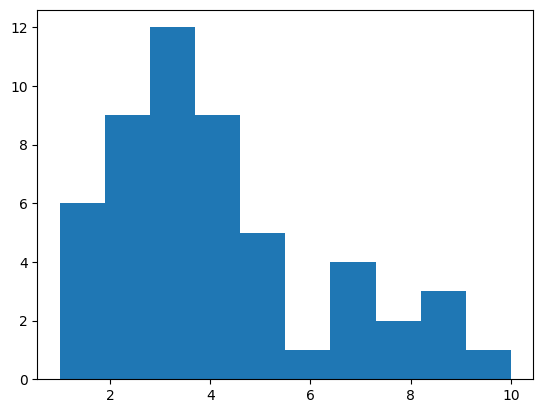

In [89]:
words = word_tokenize(str_val)

print(words)

word_lengths = [len(w) for w in words]

print(word_lengths)

plt.hist(word_lengths)

plt.show()

In [90]:
str_val2 = """The cat is in the box. The cat likes the box. The box is over the cat."""

# Bag-of-words
# Count the frequency of each word
counter = Counter(word_tokenize(str_val2))
print(counter)

# print the 5 most common words
counter.most_common(5)

Counter({'The': 3, 'cat': 3, 'the': 3, 'box': 3, '.': 3, 'is': 2, 'in': 1, 'likes': 1, 'over': 1})


[('The', 3), ('cat', 3), ('the', 3), ('box', 3), ('.', 3)]

## Preprocessing

In [91]:
tokens = [w for w in word_tokenize(str_val.lower())
         if w.isalpha()]
# show the tokens that are words (no numbers or other)
print(tokens)
print("--------------------------------------------------------")
# a pre-selected list of stop words
print(stopwords.words('english'))
print("--------------------------------------------------------")

# remove the stop words
no_stops = [t for t in tokens
           if t not in stopwords.words('english')]

print(no_stops)

print("--------------------------------------------------------")

Counter(no_stops).most_common(2)

['let', 'us', 'try', 'some', 'nlp', 'all', 'together', 'during', 'this', 'session', 'the', 'exercises', 'will', 'not', 'be', 'so', 'difficult', 'and', 'the', 'final', 'part', 'of', 'this', 'lecture', 'the', 'question', 'will', 'we', 'be', 'successful', 'and', 'will', 'there', 'be', 'student', 'who', 'dares', 'to', 'ask', 'questions', 'this', 'student', 'would', 'be', 'very', 'brave']
--------------------------------------------------------
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'him

[('student', 2), ('let', 1)]

In [92]:
# Lemmatization

wordnet_lemmatizer = WordNetLemmatizer()

lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

print(no_stops)
print("--------------------------------------------------------")
print(lemmatized)

['let', 'us', 'try', 'nlp', 'together', 'session', 'exercises', 'difficult', 'final', 'part', 'lecture', 'question', 'successful', 'student', 'dares', 'ask', 'questions', 'student', 'would', 'brave']
--------------------------------------------------------
['let', 'u', 'try', 'nlp', 'together', 'session', 'exercise', 'difficult', 'final', 'part', 'lecture', 'question', 'successful', 'student', 'dare', 'ask', 'question', 'student', 'would', 'brave']


In [93]:
# How many words are found with the same meaning?
Counter(lemmatized)
Counter(lemmatized).most_common(5)

[('question', 2), ('student', 2), ('let', 1), ('u', 1), ('try', 1)]

## GenSim

In [94]:
# Dictionary encapsulates the mapping between normalized words and their integer ids.

my_documents = ['The movie was about a spaceship and aliens.',
    'I really liked the movie!',
    'Awesome action scenes, but boring characters.',
    'The movie was awful! I hate alien films.',
    'Space is cool! I liked the movie.',
    'More space films, please!']

tokenized_docs = [word_tokenize(doc.lower())
                 for doc in my_documents]

dictionary = Dictionary(tokenized_docs)

In [95]:
dictionary.token2id

{'.': 0,
 'a': 1,
 'about': 2,
 'aliens': 3,
 'and': 4,
 'movie': 5,
 'spaceship': 6,
 'the': 7,
 'was': 8,
 '!': 9,
 'i': 10,
 'liked': 11,
 'really': 12,
 ',': 13,
 'action': 14,
 'awesome': 15,
 'boring': 16,
 'but': 17,
 'characters': 18,
 'scenes': 19,
 'alien': 20,
 'awful': 21,
 'films': 22,
 'hate': 23,
 'cool': 24,
 'is': 25,
 'space': 26,
 'more': 27,
 'please': 28}

In [96]:
# Convert document into the bag-of-words (BoW) format = list of (token_id, token_count) tuples
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

In [97]:
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(5, 1), (7, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(0, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)],
 [(0, 1),
  (5, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1)],
 [(0, 1), (5, 1), (7, 1), (9, 1), (10, 1), (11, 1), (24, 1), (25, 1), (26, 1)],
 [(9, 1), (13, 1), (22, 1), (26, 1), (27, 1), (28, 1)]]

## Term Frequency - Inverse Document Frequency (TF-IDF)

In [98]:
tfidf = TfidfModel(corpus)

In [99]:
tfidf[corpus[3]]

[(0, 0.11167183378630395),
 (5, 0.11167183378630395),
 (7, 0.11167183378630395),
 (8, 0.30257609456991347),
 (9, 0.11167183378630395),
 (10, 0.19090426078360948),
 (20, 0.4934803553535229),
 (21, 0.4934803553535229),
 (22, 0.30257609456991347),
 (23, 0.4934803553535229)]

## Named Entity Recognition

In [100]:
sentence = '''In New York, I like to ride the Metro to visit MOMA 
                      and some restaurants rated well by Ruth Reichl.'''

tokenized_sent = nltk.word_tokenize(sentence)

In [101]:
# Categorizing and Tagging Words
tagged_sent = nltk.pos_tag(tokenized_sent)
print(tagged_sent)

[('In', 'IN'), ('New', 'NNP'), ('York', 'NNP'), (',', ','), ('I', 'PRP'), ('like', 'VBP'), ('to', 'TO'), ('ride', 'VB'), ('the', 'DT'), ('Metro', 'NNP'), ('to', 'TO'), ('visit', 'VB'), ('MOMA', 'NNP'), ('and', 'CC'), ('some', 'DT'), ('restaurants', 'NNS'), ('rated', 'VBN'), ('well', 'RB'), ('by', 'IN'), ('Ruth', 'NNP'), ('Reichl', 'NNP'), ('.', '.')]


 - CC coordinating conjunction
 - CD cardinal digit
 - DT determiner
 - EX existential there (like: "there is" ... think of it like "there exists")
 - FW foreign word
 - IN preposition/subordinating conjunction
 - JJ adjective 'big'
 - JJR adjective, comparative 'bigger'
 - JJS adjective, superlative 'biggest'
 - LS list marker 1)
 - MD modal could, will
 - NN noun, singular 'desk'
 - NNS noun plural 'desks'
 - NNP proper noun, singular 'Harrison'
 - NNPS proper noun, plural 'Americans'
 - PDT predeterminer 'all the kids'
 - POS possessive ending parent's
 - PRP personal pronoun I, he, she
 - PRP\$ possessive pronoun my, his, hers
 - RB adverb very, silently,
 - RBR adverb, comparative better
 - RBS adverb, superlative best
 - RP particle give up
 - TO to go 'to' the store.
 - UH interjection errrrrrrrm
 - VB verb, base form take
 - VBD verb, past tense took
 - VBG verb, gerund/present participle taking
 - VBN verb, past participle taken
 - VBP verb, sing. present, non-3d take
 - VBZ verb, 3rd person sing. present takes
 - WDT wh-determiner which
 - WP wh-pronoun who, what
 - WP\$ possessive wh-pronoun whose
 - WRB wh-abverb where, when

In [102]:
# NLTK provides a classifier that has already been trained to recognize named entities
print(nltk.ne_chunk(tagged_sent))

(S
  In/IN
  (GPE New/NNP York/NNP)
  ,/,
  I/PRP
  like/VBP
  to/TO
  ride/VB
  the/DT
  (ORGANIZATION Metro/NNP)
  to/TO
  visit/VB
  (ORGANIZATION MOMA/NNP)
  and/CC
  some/DT
  restaurants/NNS
  rated/VBN
  well/RB
  by/IN
  (PERSON Ruth/NNP Reichl/NNP)
  ./.)


# Now try it yourself

In [103]:
text = 'One of the most prominent lenders in the world of technology start-ups, struggling under the weight of ill-fated decisions and panicked customers, collapsed on Friday, forcing the federal government to step in. The Federal Deposit Insurance Corporation said on Friday that it would take over Silicon Valley Bank, a 40-year-old institution based in Santa Clara, Calif. The bank’s failure is the second-largest in U.S. history, and the largest since the financial crisis of 2008.'

In [104]:
# Print alle woorden dat een hoofdletter bevat
caps = re.findall(r'\b[A-Z][a-zA-Z]*\b', text)
print(caps)

['One', 'Friday', 'The', 'Federal', 'Deposit', 'Insurance', 'Corporation', 'Friday', 'Silicon', 'Valley', 'Bank', 'Santa', 'Clara', 'Calif', 'The', 'U', 'S']


In [105]:
# Gebruik de bag of words techniek en print de 5 meest voorkomende symbolen
tokens_text = word_tokenize(text)
symbols = [s for s in tokens_text if re.match(r'[^a-zA-Z0-9]', s)]
symbol_counter = Counter(symbols)
print(symbol_counter.most_common(5))
print("--------------------------------------------------------")
# print the 5 most common words
word_counter = Counter(word_tokenize(text))
print(word_counter.most_common(5))

[(',', 6), ('.', 3), ('’', 1)]
--------------------------------------------------------
[('the', 7), (',', 6), ('of', 4), ('in', 4), ('.', 3)]


In [106]:
# Zoek alle tokens
all_tokens = [w for w in word_tokenize(text.lower())
         if w.isalpha()]
print(all_tokens)
print("--------------------------------------------------------")

['one', 'of', 'the', 'most', 'prominent', 'lenders', 'in', 'the', 'world', 'of', 'technology', 'struggling', 'under', 'the', 'weight', 'of', 'decisions', 'and', 'panicked', 'customers', 'collapsed', 'on', 'friday', 'forcing', 'the', 'federal', 'government', 'to', 'step', 'in', 'the', 'federal', 'deposit', 'insurance', 'corporation', 'said', 'on', 'friday', 'that', 'it', 'would', 'take', 'over', 'silicon', 'valley', 'bank', 'a', 'institution', 'based', 'in', 'santa', 'clara', 'the', 'bank', 's', 'failure', 'is', 'the', 'in', 'history', 'and', 'the', 'largest', 'since', 'the', 'financial', 'crisis', 'of']
--------------------------------------------------------


In [107]:
# Welke naamentiteiten zijn er?
tagged_text = nltk.pos_tag(all_tokens)
print(tagged_text)
print("--------------------------------------------------------")
print(nltk.ne_chunk(tagged_text))
print("--------------------------------------------------------")

[('one', 'CD'), ('of', 'IN'), ('the', 'DT'), ('most', 'RBS'), ('prominent', 'JJ'), ('lenders', 'NNS'), ('in', 'IN'), ('the', 'DT'), ('world', 'NN'), ('of', 'IN'), ('technology', 'NN'), ('struggling', 'VBG'), ('under', 'IN'), ('the', 'DT'), ('weight', 'NN'), ('of', 'IN'), ('decisions', 'NNS'), ('and', 'CC'), ('panicked', 'VBD'), ('customers', 'NNS'), ('collapsed', 'VBN'), ('on', 'IN'), ('friday', 'NN'), ('forcing', 'VBG'), ('the', 'DT'), ('federal', 'JJ'), ('government', 'NN'), ('to', 'TO'), ('step', 'VB'), ('in', 'IN'), ('the', 'DT'), ('federal', 'JJ'), ('deposit', 'NN'), ('insurance', 'NN'), ('corporation', 'NN'), ('said', 'VBD'), ('on', 'IN'), ('friday', 'NN'), ('that', 'IN'), ('it', 'PRP'), ('would', 'MD'), ('take', 'VB'), ('over', 'RP'), ('silicon', 'JJ'), ('valley', 'NN'), ('bank', 'NN'), ('a', 'DT'), ('institution', 'NN'), ('based', 'VBN'), ('in', 'IN'), ('santa', 'NN'), ('clara', 'VBP'), ('the', 'DT'), ('bank', 'NN'), ('s', 'JJ'), ('failure', 'NN'), ('is', 'VBZ'), ('the', 'DT'),

## IMDB

In [108]:
%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [109]:
meta = pd.read_csv("movie.metadata.tsv", sep = '\t', header = None)
# rename columns
meta.columns = ["movie_id",1,"movie_name",3,4,5,6,7,"genre"]

meta.head()

plots = []

with open("plot_summaries.txt", 'r') as f:
       reader = csv.reader(f, dialect='excel-tab') 
       for row in tqdm(reader):
            plots.append(row)
            

movie_id = []
plot = []

# extract movie Ids and plot summaries
for i in tqdm(plots):
  movie_id.append(i[0])
  plot.append(i[1])

# create dataframe
movies = pd.DataFrame({'movie_id': movie_id, 'plot': plot})

42303it [00:00, 91397.99it/s]
100%|██████████| 42303/42303 [00:00<00:00, 5853704.67it/s]


In [110]:
movie_id = []
plot = []

# extract movie Ids and plot summaries
for i in tqdm(plots):
  movie_id.append(i[0])
  plot.append(i[1])

# create dataframe
movies = pd.DataFrame({'movie_id': movie_id, 'plot': plot})

movies.head()

100%|██████████| 42303/42303 [00:00<00:00, 4208829.90it/s]


,movie_id,plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all."
1,31186339,"The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole..."
2,20663735,"Poovalli Induchoodan is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon was framed in the case by Manapally Madhavan Nambiar and his crony DYSP Sankaranarayanan to take revenge on idealist judge Menon who had e..."
3,2231378,"The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo..."
4,595909,"Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r..."


In [111]:
# change datatype of 'movie_id'
meta['movie_id'] = meta['movie_id'].astype(str)

# merge meta with movies
movies = pd.merge(movies, meta[['movie_id', 'movie_name', 'genre']], on = 'movie_id')

movies.head()

,movie_id,plot,movie_name,genre
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World cinema""}"
1,31186339,"The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole...",The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama""}"
2,20663735,"Poovalli Induchoodan is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon was framed in the case by Manapally Madhavan Nambiar and his crony DYSP Sankaranarayanan to take revenge on idealist judge Menon who had e...",Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama"", ""/m/01chg"": ""Bollywood""}"
3,2231378,"The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""Comedy""}"
4,595909,"Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r...",A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""Drama"", ""/m/01f9r0"": ""Docudrama"", ""/m/03q4nz"": ""World cinema"", ""/m/05bh16v"": ""Courtroom Drama""}"


In [112]:
movies['genre'][0]

type(json.loads(movies['genre'][0]))

json.loads(movies['genre'][0]).values()

dict_values(['Drama', 'World cinema'])

In [113]:
# an empty list
genres = [] 

# extract genres
for i in movies['genre']: 
  genres.append(list(json.loads(i).values())) 

# add to 'movies' dataframe  
movies['genre_new'] = genres

print(genres)

[['Drama', 'World cinema'], ['Action/Adventure', 'Science Fiction', 'Action', 'Drama'], ['Musical', 'Action', 'Drama', 'Bollywood'], ['Screwball comedy', 'Comedy'], ['Crime Fiction', 'Drama', 'Docudrama', 'World cinema', 'Courtroom Drama'], ['Thriller', 'Action/Adventure', 'Action', 'Drama'], ['Thriller', 'Drama', 'Horror'], ['Drama', 'Teen'], ['Romantic comedy', 'Media Satire', 'Americana', 'Comedy-drama', 'Black-and-white', 'Drama', 'Comedy', 'Romance Film'], ['Short Film', 'Family Film', 'Animation'], ['Comedy'], ['Crime Fiction', 'Drama', 'Comedy', 'World cinema'], ['Parody', 'Comedy'], ['War film', 'Epic', 'Action/Adventure', 'Period piece', 'Drama', 'Film adaptation', 'Action', 'Political drama'], ['Cult', 'Coming of age', 'Comedy', 'Teen'], ['Horror'], ['Thriller', 'Mystery', 'Comedy film', 'Crime Fiction', 'Horror'], ['Drama'], ['Thriller', 'Crime Fiction', 'Indie', 'Martial Arts Film', 'Romance Film', 'Action'], ['Period piece', 'Drama', 'Indie'], ['Drama', 'War film'], ['Comp

In [114]:
# remove samples with 0 genre tags
movies_new = movies[~(movies['genre_new'].str.len() == 0)]

In [115]:
movies_new

,movie_id,plot,movie_name,genre,genre_new
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World cinema""}","[Drama, World cinema]"
1,31186339,"The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole...",The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama""}","[Action/Adventure, Science Fiction, Action, Drama]"
2,20663735,"Poovalli Induchoodan is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon was framed in the case by Manapally Madhavan Nambiar and his crony DYSP Sankaranarayanan to take revenge on idealist judge Menon who had e...",Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama"", ""/m/01chg"": ""Bollywood""}","[Musical, Action, Drama, Bollywood]"
3,2231378,"The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""Comedy""}","[Screwball comedy, Comedy]"
4,595909,"Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r...",A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""Drama"", ""/m/01f9r0"": ""Docudrama"", ""/m/03q4nz"": ""World cinema"", ""/m/05bh16v"": ""Courtroom Drama""}","[Crime Fiction, Drama, Docudrama, World cinema, Courtroom Drama]"
...,...,...,...,...,...
42199,34808485,"The story is about Reema , a young Muslim schoolgirl in Malabar, who loved Malayalam and poetry. The film is about her mental trauma once she was moved to an English medium school by her parents, for their social status.",Oomakkuyil Padumbol,"{""/m/0bj8m2"": ""Children's""}",[Children's]
42200,1096473,"In 1928 Hollywood, director Leo Andreyev looks through photographs for actors for his next movie. When he comes to the picture of an aged Sergius Alexander , he pauses, then tells his assistant to cast the man. Sergius shows up at the Eureka Studio with a horde of other extras and is issued a ...",The Last Command,"{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indie"", ""/m/01g6gs"": ""Black-and-white"", ""/m/04xvlr"": ""Period piece"", ""/m/07s9rl0"": ""Drama"", ""/m/082gq"": ""War film"", ""/m/03mqtr"": ""Political drama""}","[Silent film, Indie, Black-and-white, Period piece, Drama, War film, Political drama]"
42201,35102018,"American Luthier focuses on Randy Parsons’ transformation from aspiring musician to guitar-maker. The guitar had been Parsons’ identity since he was a child, but after studying classical and jazz guitar in college, he realized that he would never make a living as a musician. So he gave it up — h...",Randy Parsons: American Luthier,"{""/m/02hmvc"": ""Short Film"", ""/m/04rlf"": ""Music"", ""/m/03bxz7"": ""Biographical film"", ""/m/0jtdp"": ""Documentary""}","[Short Film, Music, Biographical film, Documentary]"
42202,8628195,"Abdur Rehman Khan , a middle-aged dry fruit seller from Afghanistan, comes to Calcutta to hawk his merchandise and befriends a small Bengali girl called Mini who reminds him of his own d

In [116]:
# get all genre tags in a list
all_genres = sum(genres,[])
len(set(all_genres))

363

In [117]:
all_genres = nltk.FreqDist(all_genres) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})

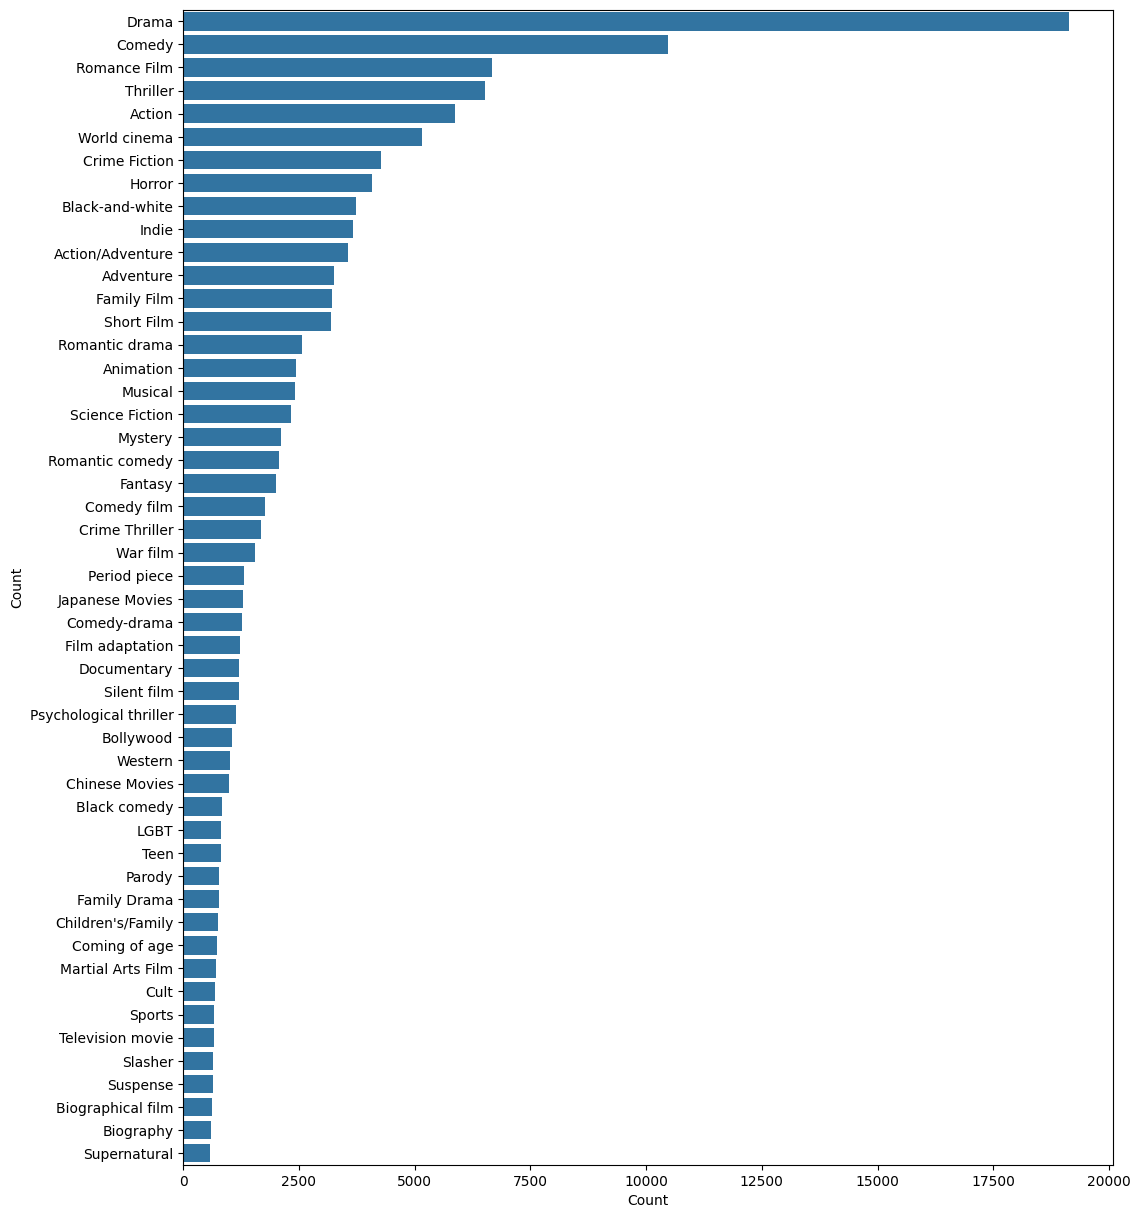

In [118]:
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

In [119]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [120]:
movies_new.loc[:,'clean_plot'] = movies_new['plot'].apply(lambda x: clean_text(x))
print(movies_new['clean_plot'])

0                                                                                                                                        shlykov a hard working taxi driver and lyosha a saxophonist develop a bizarre love hate relationship and despite their prejudices realize they arent so different after all
1        the nation of panem consists of a wealthy capitol and twelve poorer districts as punishment for a past rebellion each district must provide a boy and girl between the ages of and selected by lottery for the annual hunger games the tributes must fight to the death in an arena the sole survivor is...
2        poovalli induchoodan is sentenced for six years prison life for murdering his classmate induchoodan the only son of justice maranchery karunakara menon was framed in the case by manapally madhavan nambiar and his crony dysp sankaranarayanan to take revenge on idealist judge menon who had earlier...
3        the lemon drop kid a new york city swindler is illegally touting

/var/folders/st/_f5rh7wd52d890fm_d50r7_w0000gn/T/ipykernel_75492/3706582459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_new.loc[:,'clean_plot'] = movies_new['plot'].apply(lambda x: clean_text(x))


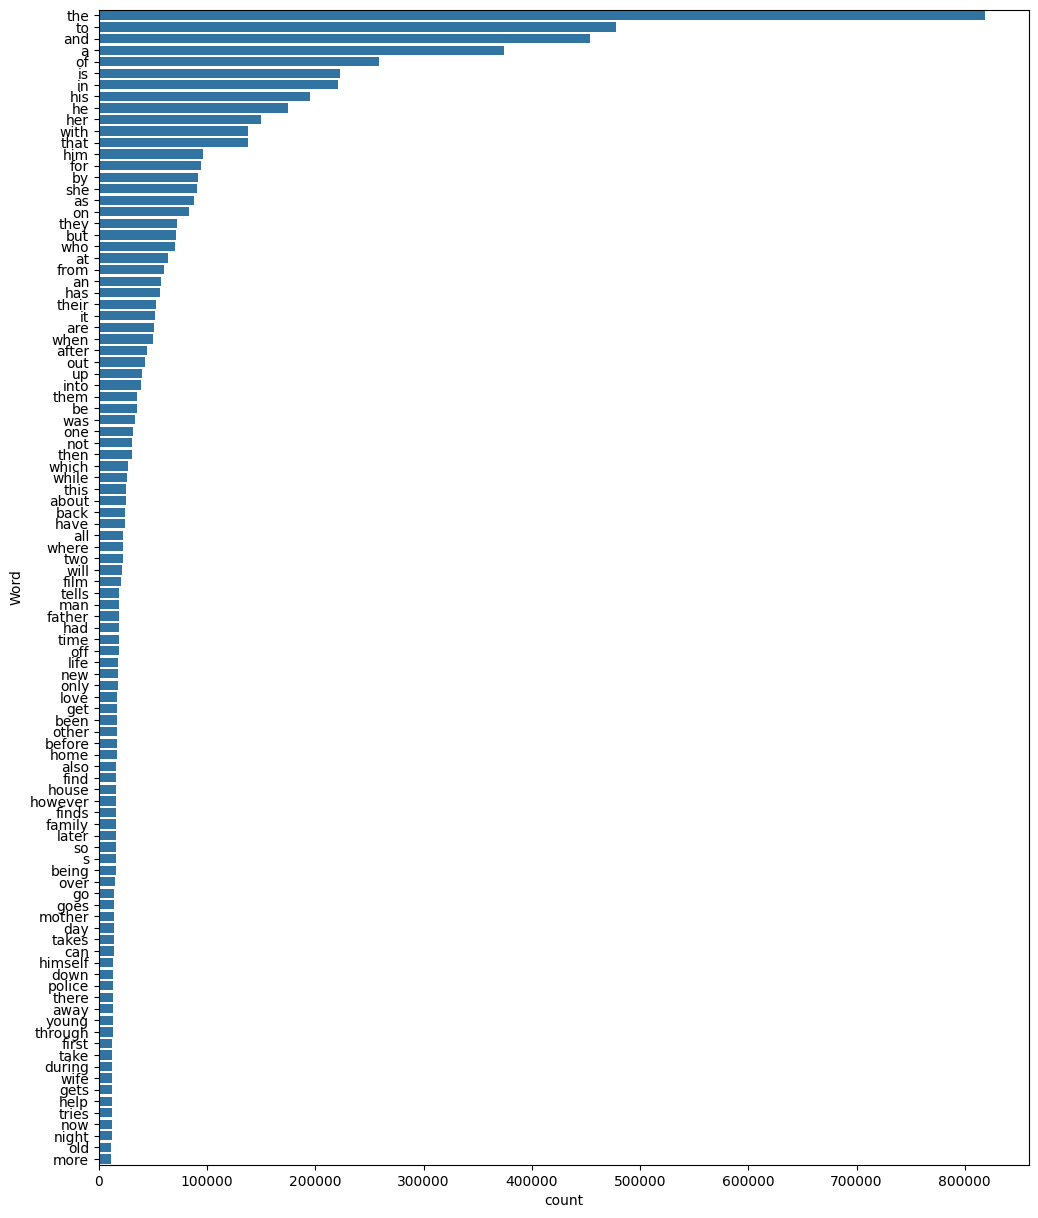

In [121]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(movies_new['clean_plot'], 100)

In [122]:
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

movies_new['clean_plot'] = movies_new['clean_plot'].apply(lambda x: remove_stopwords(x))

/var/folders/st/_f5rh7wd52d890fm_d50r7_w0000gn/T/ipykernel_75492/3517322637.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_new['clean_plot'] = movies_new['clean_plot'].apply(lambda x: remove_stopwords(x))


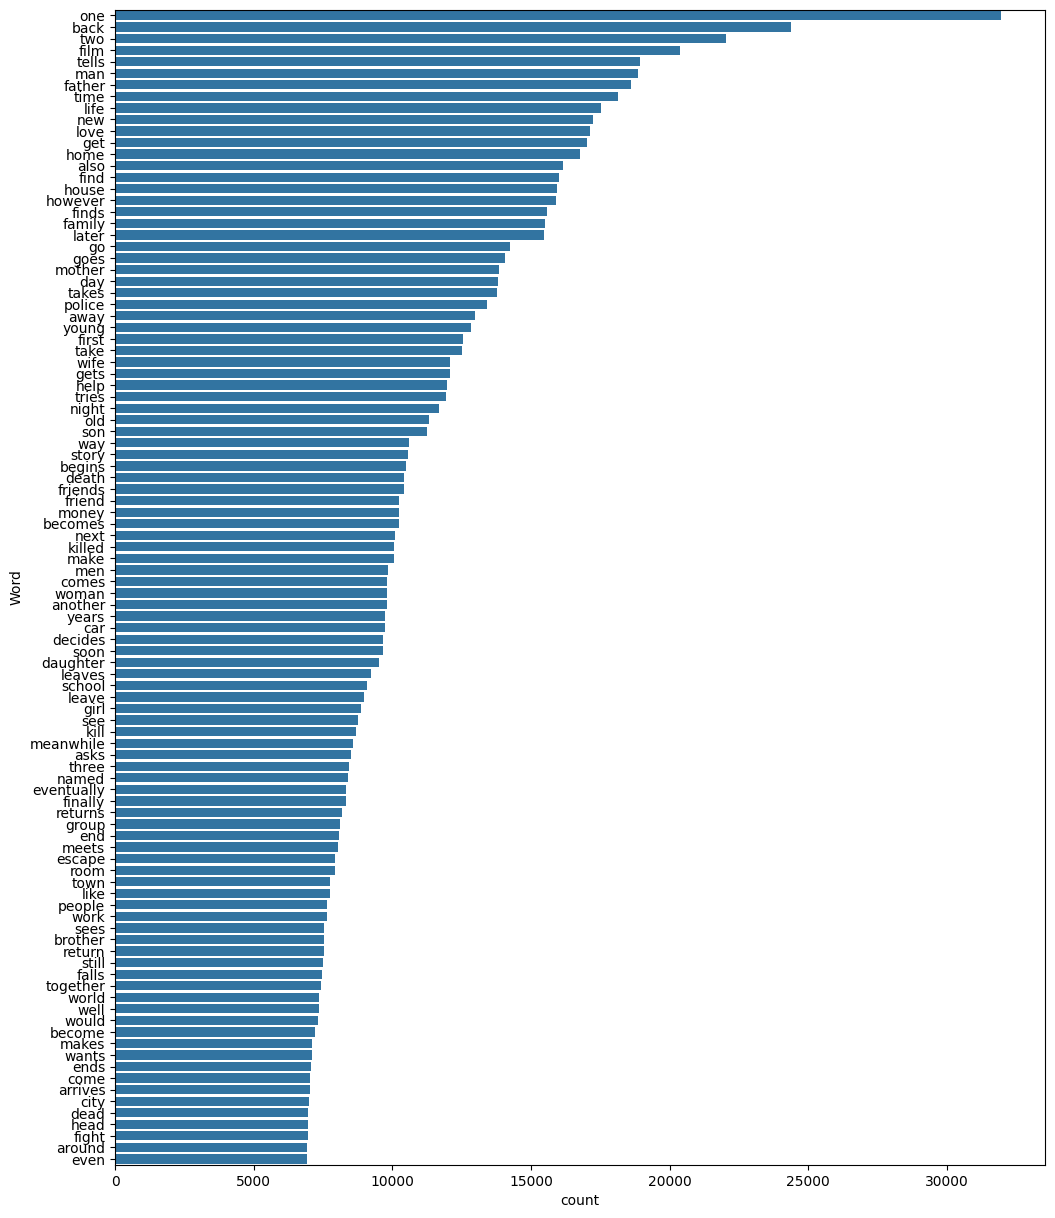

In [123]:
freq_words(movies_new['clean_plot'], 100)

In [124]:
# Although a list of sets or tuples is a very intuitive format for multilabel data, it is unwieldy to process
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(movies_new['genre_new'])

# transform target variable
y = multilabel_binarizer.transform(movies_new['genre_new'])
print(y)

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [125]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [126]:
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(movies_new['clean_plot'], y, test_size=0.2, random_state=1)

In [127]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

print(xtrain_tfidf)
print(ytrain)



  (0, 9676)	0.09940433884729688
  (0, 6595)	0.162380462666107
  (0, 9565)	0.17290571107094305
  (0, 5642)	0.08481195587799918
  (0, 6664)	0.13791857599572346
  (0, 698)	0.06463125645994927
  (0, 4719)	0.1604349145033625
  (0, 2755)	0.14010067689228253
  (0, 9136)	0.1706907659016933
  (0, 752)	0.1287720810132697
  (0, 830)	0.07844545116840852
  (0, 4644)	0.11629011542555973
  (0, 7852)	0.14624946126676602
  (0, 566)	0.16446371365895351
  (0, 3351)	0.12803623769150532
  (0, 6097)	0.22683712520673127
  (0, 9323)	0.09695069311091149
  (0, 7453)	0.11728196499035853
  (0, 4950)	0.1991474980748429
  (0, 2582)	0.09101661292088722
  (0, 3929)	0.09348355370755085
  (0, 4336)	0.15476678069256475
  (0, 3064)	0.17348649691020868
  (0, 9260)	0.1665198823746129
  (0, 4166)	0.1287977858489608
  :	:
  (33433, 4200)	0.11826720915920208
  (33433, 5794)	0.1294810150938723
  (33433, 6721)	0.17011095336443027
  (33433, 804)	0.12191755770588228
  (33433, 359)	0.12204226900691767
  (33433, 5329)	0.12094083230

In [128]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
lr = LogisticRegression()
# https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html
clf = OneVsRestClassifier(lr)

In [129]:
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

/Users/juanbenjumea/coding/EHB/AIE/.venv/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 61 is present in all training examples.
  warnings.warn(
/Users/juanbenjumea/coding/EHB/AIE/.venv/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 66 is present in all training examples.
  warnings.warn(
/Users/juanbenjumea/coding/EHB/AIE/.venv/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 259 is present in all training examples.
  warnings.warn(
/Users/juanbenjumea/coding/EHB/AIE/.venv/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 292 is present in all training examples.
  warnings.warn(
/Users/juanbenjumea/coding/EHB/AIE/.venv/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 345 is present in all training examples.
  warnings.warn(


OneVsRestClassifier(estimator=LogisticRegression())

In [130]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

print(y_pred)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [131]:
multilabel_binarizer.inverse_transform(y_pred)[3]

('Drama',)

In [132]:
# evaluate performance
f1_score(yval, y_pred, average="micro")

0.3188898329085245

In [133]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)
t = 0.3 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)
# evaluate performance
f1_score(yval, y_pred_new, average="micro")

0.4383807850986479

In [134]:
def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [135]:
for i in range(5): 
  k = xval.sample(1).index[0] 
  print("Movie: ", movies_new['movie_name'][k], "\nPredicted genre: ", infer_tags(xval[k])), print("Actual genre: ",movies_new['genre_new'][k], "\n")

Movie:  Ernest Goes to Africa 
Predicted genre:  [('Comedy',)]
Actual genre:  ['Family Film', 'Comedy of Errors', 'Adventure Comedy', 'Comedy', 'Slapstick'] 

Movie:  My Reincarnation 
Predicted genre:  [('Drama',)]
Actual genre:  ['Biographical film', 'Biography', 'Adventure', 'Family Film', 'Documentary'] 

Movie:  Birds Do It 
Predicted genre:  [('Action',)]
Actual genre:  ["Children's/Family", 'Action', 'Comedy', 'Spy'] 

Movie:  Yehi Hai Zindagi 
Predicted genre:  [('Drama',)]
Actual genre:  ['Bollywood'] 

Movie:  Woman's World 
Predicted genre:  [('Drama',)]
Actual genre:  ['Drama'] 



In [139]:
# Probeer een OneVsRestClassifier met een linear regressie model
linear = LinearRegression()
clinearf = OneVsRestClassifier(linear)

clinearf.fit(xtrain_tfidf, ytrain)

/Users/juanbenjumea/coding/EHB/AIE/.venv/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 61 is present in all training examples.
  warnings.warn(
/Users/juanbenjumea/coding/EHB/AIE/.venv/lib/python3.12/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 66 is present in all training examples.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
y_pred = clinearf.predict(xval_tfidf)

print(y_pred)